In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [2]:
car_pd = pd.read_csv("CarPrice.csv")
car_pd

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
word_columns = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']
for col in word_columns:
    print(col,":",car_pd[col].unique())

symboling : [ 3  1  2  0 -1 -2]
fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [4]:
car_data = car_pd.copy()
car_pd.pop('car_ID')
car_pd.pop('CarName')
car_pd["cylindernumber"] = car_pd["cylindernumber"].replace(
    {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
car_pd.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
num_columns = car_pd.columns.drop(word_columns)


In [6]:
print(num_columns)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [7]:
def OneHotEncoder(dataframe, column):
    obj = dataframe[column].unique().tolist()
    for i in range(len(dataframe)):
        dataframe.loc[i,column] = obj.index(dataframe.loc[i,column])

In [8]:
#去重查看CarName
print(car_data['CarName'].drop_duplicates())#验证是否object全部改为数值类型


0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
196                 volvo 244dl
197                   volvo 245
198                 volvo 264gl
199                volvo diesel
203                   volvo 246
Name: CarName, Length: 147, dtype: object


In [9]:
#利用split，由CarName拆出品牌信息
carBrand = car_data['CarName'].str.split(expand=True)[0]
#查看汽车品牌名称（过滤重复）
print(set(carBrand))


{'isuzu', 'saab', 'buick', 'audi', 'subaru', 'mitsubishi', 'jaguar', 'volvo', 'Nissan', 'nissan', 'volkswagen', 'plymouth', 'porcshce', 'renault', 'honda', 'bmw', 'toyota', 'toyouta', 'vokswagen', 'alfa-romero', 'mazda', 'chevrolet', 'vw', 'maxda', 'peugeot', 'porsche', 'mercury', 'dodge'}


In [10]:
#修改品牌名称的不规则命名
carBrand = carBrand.replace({'porcshce':'porsche','vokswagen':'volkswagen','Nissan':'nissan','maxda':'mazda','vw':'volkswagen','toyouta':'toyota'})
print(set(carBrand))

#将carBrand放入原数据集中
car_data['carBrand'] = carBrand
print(len(set(carBrand)))

{'isuzu', 'saab', 'buick', 'audi', 'subaru', 'mitsubishi', 'jaguar', 'volvo', 'nissan', 'volkswagen', 'plymouth', 'renault', 'honda', 'bmw', 'toyota', 'alfa-romero', 'mazda', 'chevrolet', 'peugeot', 'porsche', 'mercury', 'dodge'}
22


In [11]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


在汽车销售等实际业务中，很多消费者购买需求有时会根据考虑车型的大小来考虑。
欧系分类，按德国标准，车型大小可按照车长，轴距划分为6类：(单位：英寸)
按车身长度分类界限：微型车： A00 <145.67 ；小型车： A0 <169.29 ；紧凑型车：A <181.10 ；中型车： B <192.91 ；中大型车：C <200.79 ；大型车： D >200.79

In [14]:
# 由上面描述性统计可知，车身长范围为141.1~208.1英寸之间，可划分为6类
bins=[min(car_pd.carlength)-0.01,145.67,169.29,181.10,192.91,200.79,max(car_pd.carlength)+0.01]
label=['A00','A0','A','B','C','D']
carSize=pd.cut(car_pd.carlength,bins,labels=label)
print(carSize.unique())

#将车型大小分类放入数据集中
car_data['carSize']=carSize
car_pd['carSize']=carSize


['A0', 'A', 'B', 'C', 'A00', 'D']
Categories (6, object): ['A00' < 'A0' < 'A' < 'B' < 'C' < 'D']


In [15]:
#查看数值型特征的相关系数
df_corr=car_pd.corr()
df_corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


相关系数分类： 0.8-1.0 极强相关；0.6-0.8 强相关；0.4-0.6 中等程度相关；0.2-0.4 弱相关；0.0-0.2 极弱相关或无相关
由热力图可看出： 车长、宽、轴距三者都极强相关，整备质量和车长、宽、发动机尺寸极强相关，价格与车整备质量、发动机尺寸、马力具有极强相关性，等等。部分数据之间存在高度相似，数据存在冗余。

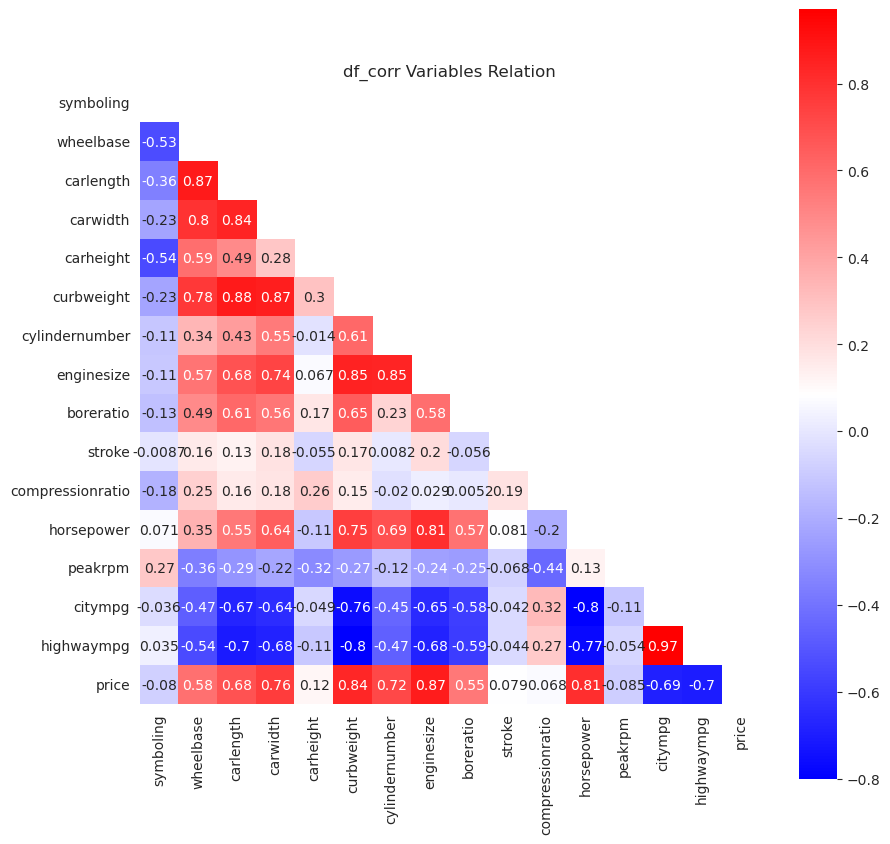

In [16]:
#绘制相关性热力图
mask=np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax=sns.heatmap(df_corr,mask=mask,square=True,annot=True,cmap='bwr')
ax.set_title("df_corr Variables Relation")
plt.show()

In [19]:
#剔除carlength
features=car_pd.drop(['carlength'],axis=1)


# 将取值具有大小意义的类别型变量数据转变为数值型映射
features1=features.copy()

#使用LabelEncoder对不具实体数值数据编码
from sklearn.preprocessing import LabelEncoder
carSize1=LabelEncoder().fit_transform(features1['carSize'])
features1['carSize']=carSize1
print(features['carSize'].unique())
print(features1['carSize'].unique())

['A0', 'A', 'B', 'C', 'A00', 'D']
Categories (6, object): ['A00' < 'A0' < 'A' < 'B' < 'C' < 'D']
[1 0 3 4 2 5]


In [20]:
#对于类别离散型特征，取值间没有大小意义的，可采用one-hot编码
cate=features1.select_dtypes(include='object').columns
print(cate)
features1=features1.join(pd.get_dummies(features1[cate])).drop(cate,axis=1)
features1.head()


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')


,symboling,wheelbase,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,65.5,52.4,2823,6,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,66.2,54.3,2337,4,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,66.4,54.3,2824,5,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#对数值型数据进行归一化
from sklearn import preprocessing
features1=preprocessing.MinMaxScaler().fit_transform(features1)
features1=pd.DataFrame(features1)
features1.head()


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.058309,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.058309,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.230321,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.384840,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.373178,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


利用PCA对高维数据进行降维。
目的：在信息损失较小的前提下，将高维数据转换到低维，从而减少计算量。把可能具有线性相关的高维变量合成线性无关的低维变量，成为主成分。保留最大的方差方向，使从变换特征回到原始特征的误差最小。

In [23]:
#对数据集进行PCA降维（信息保留为99.99%）
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9999)  #保证降维后的数据保持90%的信息，则填0.9
features2=pca.fit_transform(features1)

#降维后，每个主要成分的解释方差占比（解释PC携带的信息多少）
ratio=pca.explained_variance_ratio_
print('各主成分的解释方差占比：',ratio)

#降维后有几个成分
print('降维后有几个成分：',len(ratio))

#累计解释方差占比
cum_ratio=np.cumsum(ratio)
print('累计解释方差占比：',cum_ratio)


各主成分的解释方差占比： [2.39780781e-01 2.00631256e-01 1.19647716e-01 6.96158725e-02
 6.26813731e-02 4.62476101e-02 4.18234241e-02 3.29587027e-02
 2.56724995e-02 2.20879580e-02 1.96367534e-02 1.62909630e-02
 1.46554010e-02 1.37454104e-02 1.07092251e-02 9.71883628e-03
 8.63702444e-03 7.92104086e-03 6.68243901e-03 5.57160062e-03
 4.42099290e-03 3.83735876e-03 3.15124051e-03 2.71801338e-03
 2.28419651e-03 1.78287025e-03 1.47721184e-03 1.15039081e-03
 1.10987714e-03 9.48527208e-04 6.71068839e-04 4.98987159e-04
 4.35515101e-04 3.22617234e-04 1.86844410e-04 1.16073554e-04
 1.07112858e-04]
降维后有几个成分： 37
累计解释方差占比： [0.23978078 0.44041204 0.56005975 0.62967563 0.692357   0.73860461
 0.78042803 0.81338674 0.83905924 0.86114719 0.88078395 0.89707491
 0.91173031 0.92547572 0.93618495 0.94590378 0.95454081 0.96246185
 0.96914429 0.97471589 0.97913688 0.98297424 0.98612548 0.98884349
 0.99112769 0.99291056 0.99438777 0.99553816 0.99664804 0.99759657
 0.99826764 0.99876662 0.99920214 0.99952476 0.9997116  0.99982

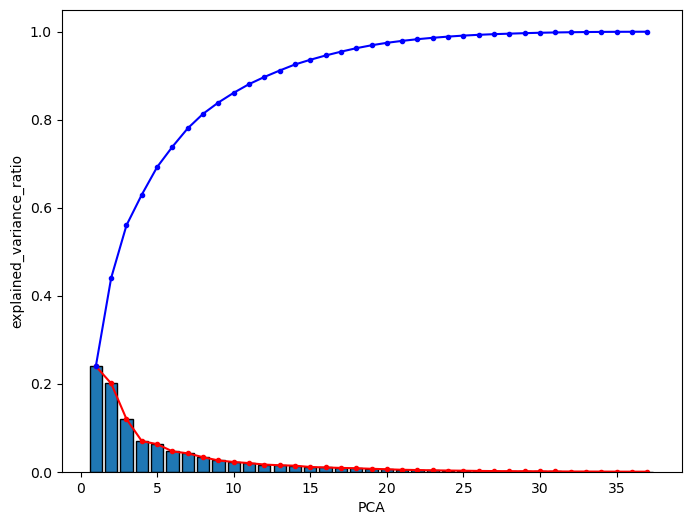

In [24]:
#绘制PCA降维后各成分方差占比的直方图和累计方差占比折线图
plt.figure(figsize=(8,6))
X=range(1,len(ratio)+1)
Y=ratio
plt.bar(X,Y,edgecolor='black')
plt.plot(X,Y,'r.-')
plt.plot(X,cum_ratio,'b.-')
plt.ylabel('explained_variance_ratio')
plt.xlabel('PCA')
plt.show()

蓝色折线为累计方差占比。 降维后，选择几个维度表示原数据集的特征更合适： 一般会根据帕累托的二八原则，选择累计解释方差大于80%的前几个成分。根据蓝色折线图各成分的累计方差占比看出，当选取保留8个主要成分时，累计解释方差大于80%。

In [25]:
#PCA选择降维保留7个主要成分
pca=PCA(n_components=8) 
features3=pca.fit_transform(features1)

#降维后的累计各成分方差占比和（即解释PC携带的信息多少）
print(sum(pca.explained_variance_ratio_))    #降维后，解释PC有效信息保留约81%。

0.8133867361927236


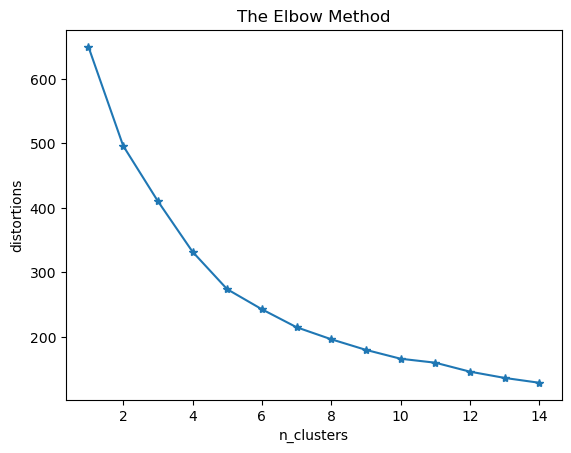

In [26]:
##肘方法看k值，簇内离差平方和
#对每一个k值进行聚类并且记下对于的SSE，然后画出k和SSE的关系图
from sklearn.cluster import KMeans

sse=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(features3)
    sse.append(km.inertia_)

plt.plot(range(1,15),sse,marker='*')
plt.xlabel('n_clusters')
plt.ylabel('distortions')
plt.title("The Elbow Method")
plt.show()   # 由肘方图可以看到，拐点在k=5处，所以k的取值为5.

In [45]:
#进行K-Means聚类分析
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_pred=kmeans.fit_predict(features3)
print(y_pred)

#将聚类后的类目放入原特征数据中
car_df_km= car_data.copy()
car_df_km['km_result']=y_pred


[4 4 4 1 1 1 1 1 1 4 4 3 4 3 3 3 4 3 2 2 5 2 2 2 5 5 5 1 5 2 2 2 2 2 2 1 1
 2 2 1 1 1 5 5 5 5 4 3 3 4 2 2 2 5 5 4 4 4 4 2 5 2 5 0 5 3 0 0 0 0 0 3 4 3
 4 4 2 2 2 2 2 2 2 2 2 5 5 1 1 5 0 5 5 5 5 2 5 5 2 5 5 1 1 1 4 4 4 3 0 3 0
 3 0 3 0 3 0 3 2 2 5 5 5 5 4 4 4 4 4 4 1 2 2 1 2 1 4 1 2 2 2 5 5 1 5 3 5 1
 5 3 2 2 5 5 5 5 5 5 0 0 5 5 5 5 2 4 4 4 4 4 4 4 4 1 0 1 1 1 4 4 3 3 0 1 0
 1 1 0 1 2 2 1 0 1 3 3 3 3 3 3 3 3 3 0 3]


对聚类效果评估。通过绘制聚类后结果的散点图，查看每簇间距离效果

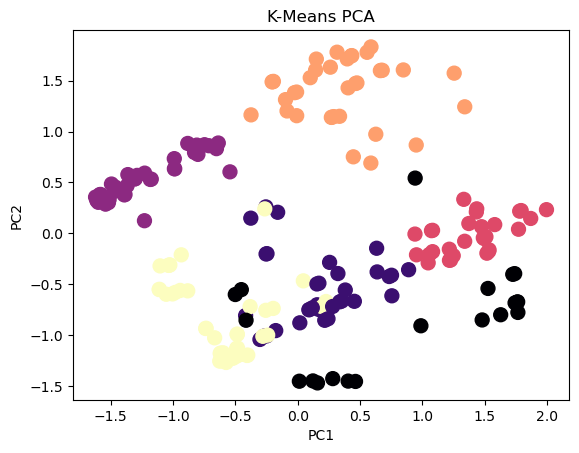

In [168]:
#绘制聚类结果2维的散点图
plt.scatter(features3[:,0],features3[:,1],c=y_pred,s=100,cmap='magma')
'''for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_data.car_ID[ii])'''
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means PCA')
plt.show()


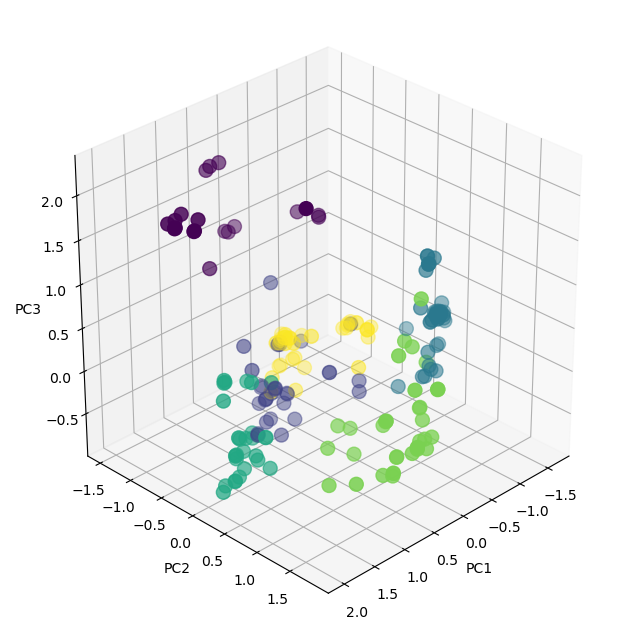

In [171]:
#由于在上图的二维坐标中蓝色聚类不是很好，故我们绘制聚类结果后3d散点图
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='3d')
ax.scatter(features3[:,0],features3[:,1],features3[:,2],c=lab,s=100)
#视角转换，转换后更易看出簇群
ax.view_init(30,45) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

n_cluster= 2 The average silhouette_score is : 0.25261341880561095
n_cluster= 3 The average silhouette_score is : 0.23888056972484906
n_cluster= 4 The average silhouette_score is : 0.2882859115648673
n_cluster= 5 The average silhouette_score is : 0.31693841847265125
n_cluster= 6 The average silhouette_score is : 0.32374996325190847
n_cluster= 7 The average silhouette_score is : 0.3525100625910827
n_cluster= 8 The average silhouette_score is : 0.35294528902033523


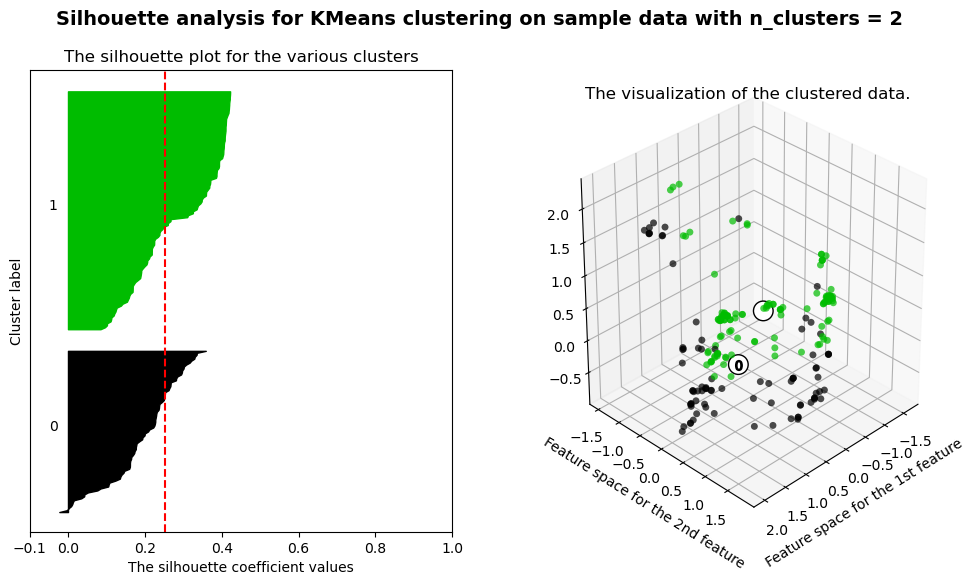

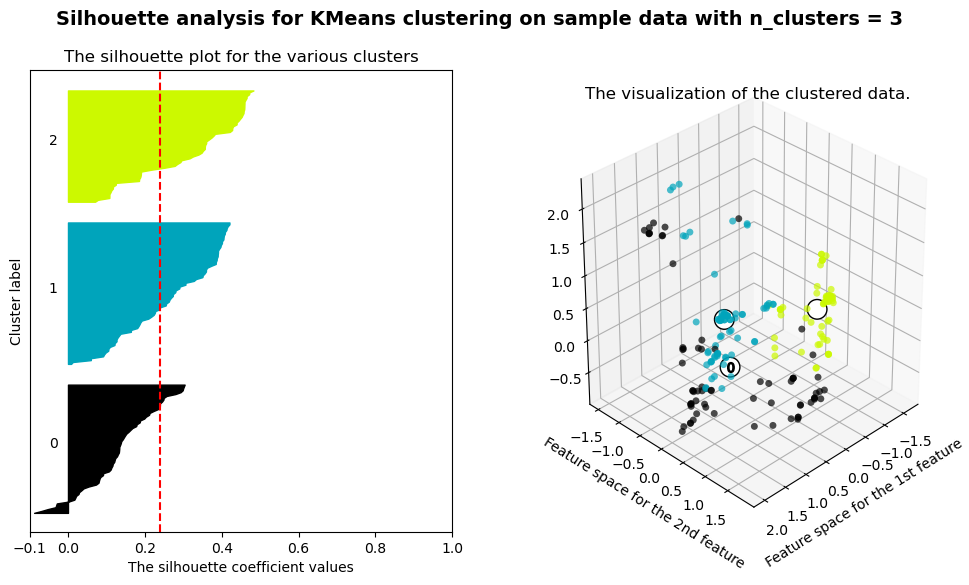

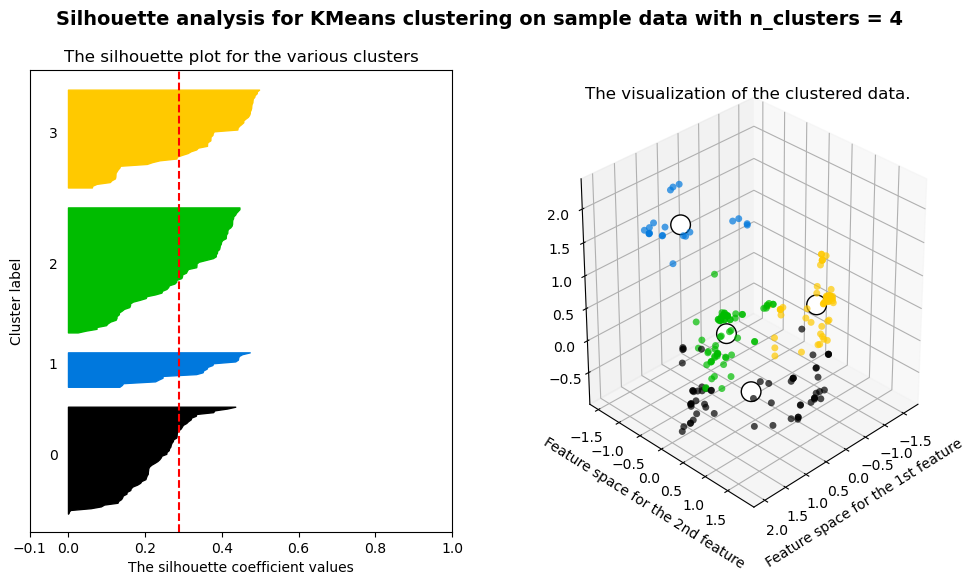

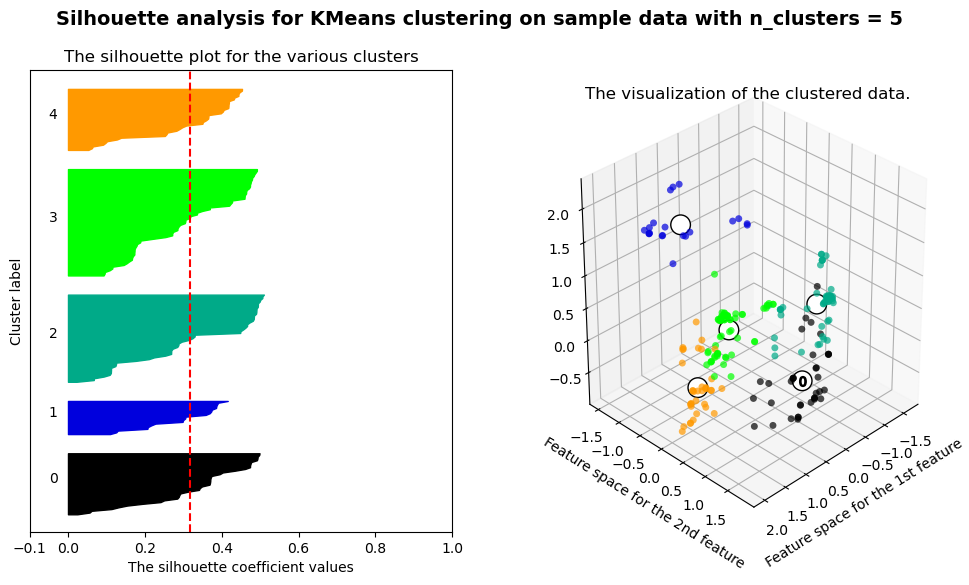

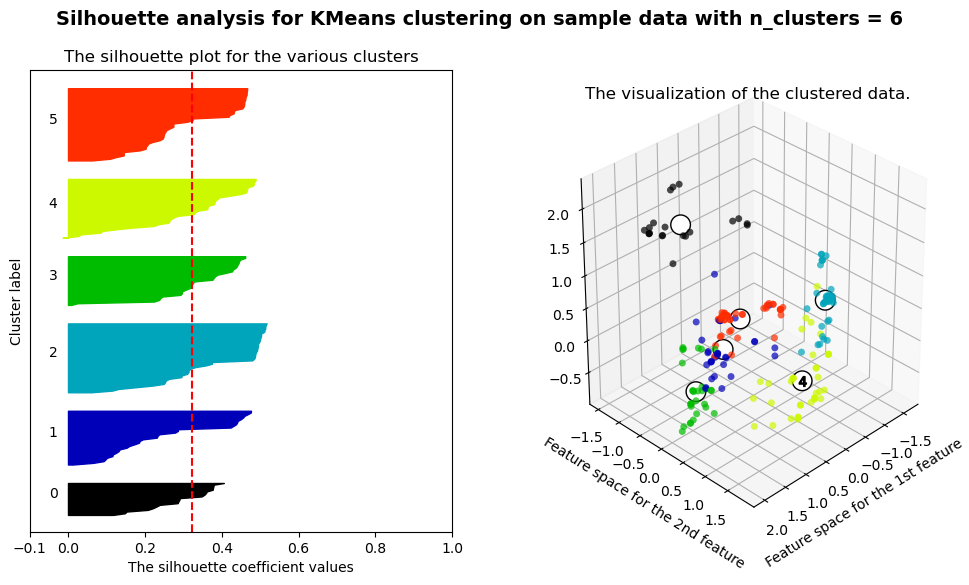

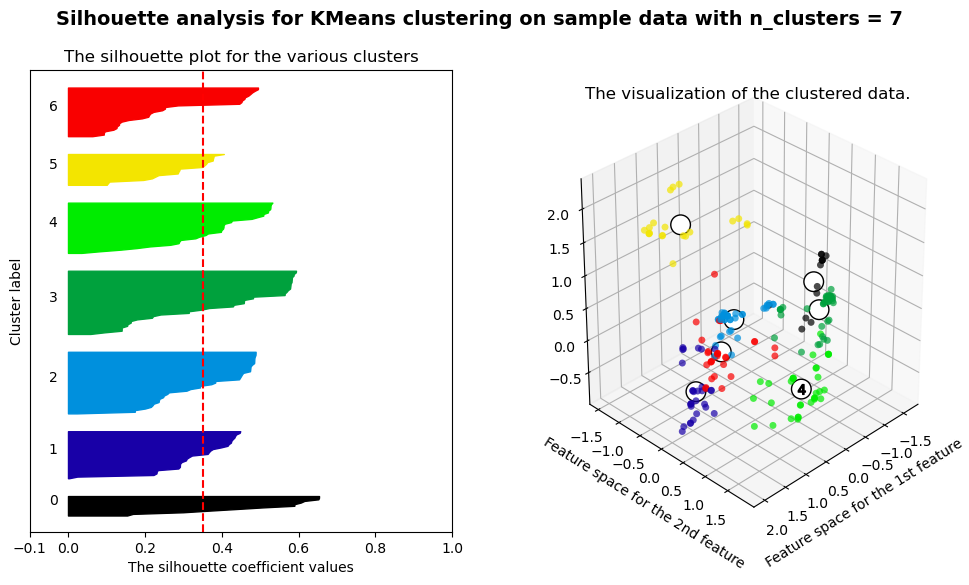

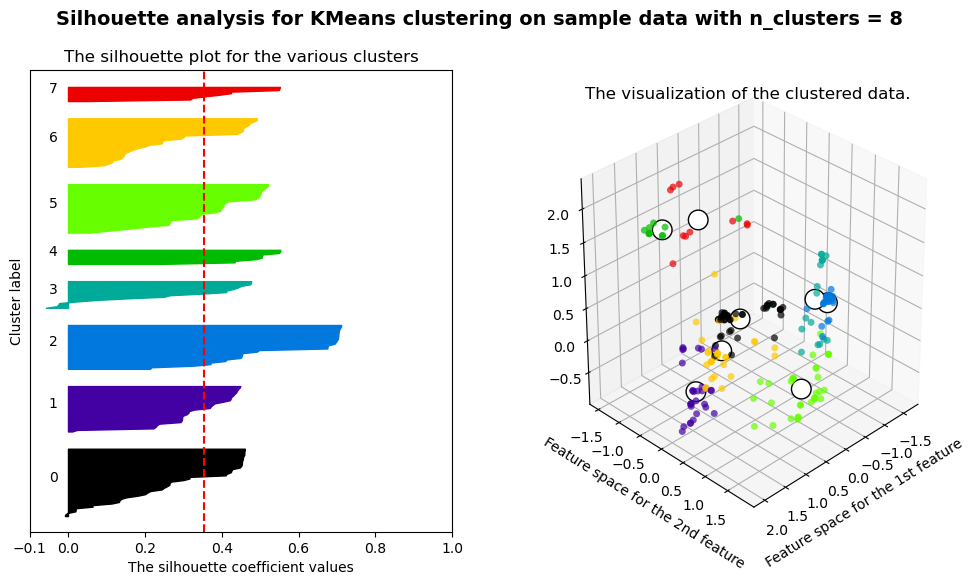

In [178]:
#绘制轮廓图和3d散点图
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

for n_clusters in range(2,9):
    fig=plt.figure(figsize=(12,6))
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122,projection='3d')
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(features3)+(n_clusters+1)*10])
    km=KMeans(n_clusters=n_clusters,init='k-means++',n_init=10,max_iter=300,random_state=0)
    y_km=km.fit_predict(features3)
    silhouette_avg=silhouette_score(features3,y_km)
    print('n_cluster=',n_clusters,'The average silhouette_score is :',silhouette_avg)

    cluster_labels=np.unique(y_km)   
    silhouette_vals=silhouette_samples(features3,y_km,metric='euclidean')
    y_ax_lower=10
    for i in range(n_clusters):
        c_silhouette_vals=silhouette_vals[y_km==i]
        c_silhouette_vals.sort()
        cluster_i=c_silhouette_vals.shape[0]
        y_ax_upper=y_ax_lower+cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(range(y_ax_lower,y_ax_upper),0,c_silhouette_vals,edgecolor='none',color=color)
        ax1.text(-0.05,y_ax_lower+0.5*cluster_i,str(i))
        y_ax_lower=y_ax_upper+10
    ax1.set_title('The silhouette plot for the various clusters')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1.0])

    colors=cm.nipy_spectral(y_km.astype(float)/n_clusters)
    ax2.scatter(features3[:,0],features3[:,1],features3[:,2],marker='.',s=100,lw=0,alpha=0.7,c=colors,edgecolor='k')
    centers=km.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],centers[:,2],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    for i,c in enumerate(centers):
        ax2.scatter(c[0],c[1],c[2],marker='$%d$' % i,alpha=1,s=50,edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.view_init(30,45)

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
plt.show()


In [46]:
#统计聚类后每个集群的车型数
car_df_km.groupby('km_result')['car_ID'].count()


km_result
0    20
1    33
2    42
3    30
4    36
5    44
Name: car_ID, dtype: int64

In [47]:
#统计每个集群各个品牌的车型数
car_df_km.groupby(by=['km_result','carBrand'])['car_ID'].count()

km_result  carBrand   
0          buick           4
           mazda           2
           nissan          1
           peugeot         5
           toyota          3
           volkswagen      4
           volvo           1
1          audi            6
           dodge           1
           honda           5
           mitsubishi      2
           nissan          3
           renault         1
           saab            3
           subaru          2
           toyota          4
           volkswagen      6
2          chevrolet       2
           dodge           4
           honda           7
           mazda           5
           mitsubishi      9
           nissan          2
           plymouth        2
           renault         1
           saab            2
           subaru          3
           toyota          3
           volkswagen      2
3          bmw             5
           buick           2
           jaguar          2
           mazda           1
           peugeot  

In [48]:
#统计每个品牌所属各个集群的车型数
car_df_km.groupby(by=['carBrand','km_result'])['km_result'].count()


carBrand     km_result
alfa-romero  4             3
audi         1             6
             4             1
bmw          3             5
             4             3
buick        0             4
             3             2
             4             2
chevrolet    2             2
             5             1
dodge        1             1
             2             4
             5             4
honda        1             5
             2             7
             5             1
isuzu        4             1
             5             3
jaguar       3             2
             4             1
mazda        0             2
             2             5
             3             1
             4             4
             5             5
mercury      4             1
mitsubishi   1             2
             2             9
             5             2
nissan       0             1
             1             3
             2             2
             4             3
             5      

In [49]:
#查看特指车名‘vokswagen’车型的聚类集群
df=car_df_km.loc[:,['car_ID','CarName','carBrand','km_result']]
print(df.loc[df['CarName'].str.contains("vokswagen")])


     car_ID           CarName    carBrand  km_result
182     183  vokswagen rabbit  volkswagen          0


In [50]:
#查看特指车名为‘vokswagen’车型的竞品车型（分类0的所有车型）
df.loc[df['km_result']==0]


,car_ID,CarName,carBrand,km_result
63,64,mazda glc deluxe,mazda,0
66,67,mazda rx-7 gs,mazda,0
67,68,buick electra 225 custom,buick,0
68,69,buick century luxus (sw),buick,0
69,70,buick century,buick,0
70,71,buick skyhawk,buick,0
90,91,nissan gt-r,nissan,0
108,109,peugeot 304,peugeot,0
110,111,peugeot 504,peugeot,0
112,113,peugeot 604sl,peugeot,0


In [54]:
len(features3[0])

8

In [151]:
#X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_train = pd.DataFrame(features3)
clustering = DBSCAN(eps=0.8, min_samples=10).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [152]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
-1,125
0,33
2,16
4,11
1,10
3,10


In [153]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 125


### Agglomerative Hierarchical

In [214]:
clustering_model = AgglomerativeClustering(n_clusters=6, linkage="ward")
clustering_model.fit(features3)
labels = clustering_model.labels_
labels 

array([4, 4, 4, 3, 3, 0, 3, 3, 3, 0, 4, 5, 4, 5, 5, 5, 4, 5, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 1, 1,
       1, 1, 4, 5, 5, 4, 0, 0, 0, 1, 1, 4, 4, 4, 4, 0, 1, 0, 1, 2, 1, 5,
       2, 2, 2, 2, 2, 5, 4, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3,
       3, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 3, 4, 0, 4, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 0, 0, 1, 1, 1, 1, 0, 4, 4, 4, 4, 4, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 1, 1, 3, 1, 3, 1, 3, 1, 3, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3,
       3, 3, 4, 4, 5, 5, 2, 0, 2, 3, 3, 2, 3, 0, 0, 3, 2, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 5], dtype=int64)

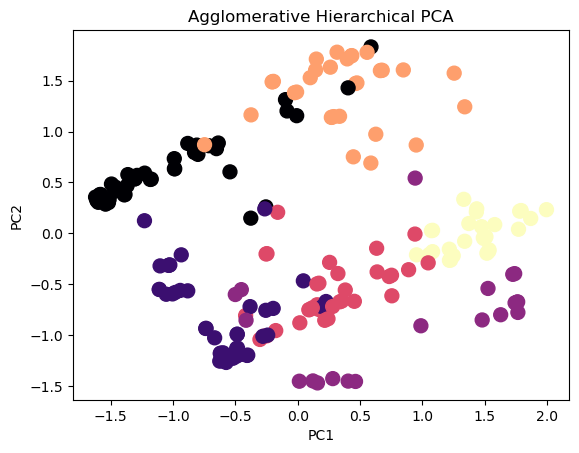

In [167]:
#绘制聚类结果2维的散点图
plt.scatter(features3[:,0],features3[:,1],c=labels,s=100,cmap='magma')
'''for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_data.car_ID[ii])'''
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Hierarchical PCA')
plt.show()

In [215]:
car_df_ = car_data.copy()
car_df_sc['sc_result'] = labels
car_df_sc.groupby('sc_result')['car_ID'].count()

sc_result
0    47
1    45
2    20
3    33
4    32
5    28
Name: car_ID, dtype: int64

### Birch

In [205]:
from sklearn.cluster import Birch
clustering = Birch(n_clusters=6).fit(features3)
labels = clustering.labels_
labels

array([2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 4, 4, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 5, 1, 4,
       3, 3, 3, 3, 3, 4, 2, 4, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       1, 2, 5, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 1, 1, 1, 5, 5, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 1,
       1, 1, 2, 2, 4, 4, 5, 2, 5, 1, 1, 5, 1, 2, 2, 1, 5, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4], dtype=int64)

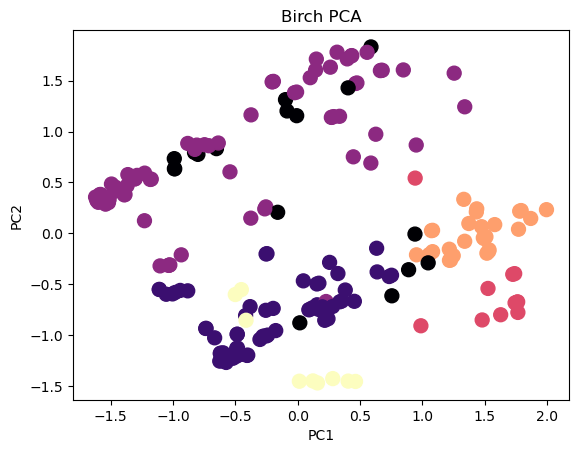

In [187]:
#绘制聚类结果2维的散点图
plt.scatter(features3[:,0],features3[:,1],c=labels,s=100,cmap='magma')
'''for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_data.car_ID[ii])'''
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Birch PCA')
plt.show()

In [206]:
car_df_b = car_data.copy()
car_df_b['b_result'] = labels
car_df_b.groupby('b_result')['car_ID'].count()

b_result
0    19
1    64
2    74
3    11
4    28
5     9
Name: car_ID, dtype: int64

In [213]:
df = car_df_b.loc[:,['car_ID','CarName','carBrand','b_result']]
df.loc[df['b_result']==0]

,car_ID,CarName,carBrand,b_result
8,9,audi 4000,audi,0
9,10,audi 5000s (diesel),audi,0
23,24,dodge d200,dodge,0
27,28,dodge coronet custom,dodge,0
29,30,dodge coronet custom (sw),dodge,0
75,76,mercury cougar,mercury,0
79,80,mitsubishi g4,mitsubishi,0
80,81,mitsubishi mirage g4,mitsubishi,0
82,83,mitsubishi outlander,mitsubishi,0
83,84,mitsubishi g4,mitsubishi,0


### Spectral Clustering

In [194]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=6).fit(features3)
labels = clustering.labels_
labels

array([4, 4, 4, 1, 5, 1, 1, 1, 5, 3, 4, 5, 4, 5, 5, 5, 4, 5, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 5, 5, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 0, 1, 5,
       0, 2, 2, 2, 2, 5, 4, 5, 4, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 4, 4, 4, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 1, 3, 1, 1, 1, 1, 3, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1,
       1, 1, 4, 4, 5, 5, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 5])

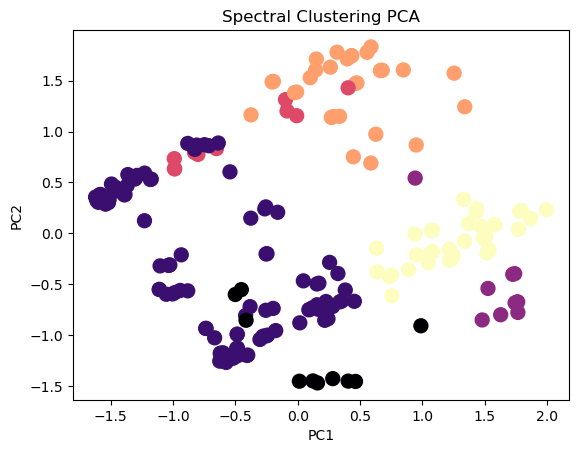

In [196]:
#绘制聚类结果2维的散点图
plt.scatter(features3[:,0],features3[:,1],c=labels,s=100,cmap='magma')
'''for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_data.car_ID[ii])'''
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clustering PCA')
plt.show()

In [197]:
car_df_sc = car_data.copy()
car_df_sc['sc_result'] = labels
car_df_sc.groupby('sc_result')['car_ID'].count()


sc_result
0     10
1    105
2     10
3     12
4     32
5     36
Name: car_ID, dtype: int64

In [203]:
df = car_df_sc.loc[:,['car_ID','CarName','carBrand','sc_result']]
df.loc[df['sc_result']==0]

,car_ID,CarName,carBrand,sc_result
63,64,mazda glc deluxe,mazda,0
66,67,mazda rx-7 gs,mazda,0
90,91,nissan gt-r,nissan,0
158,159,toyota corona,toyota,0
159,160,toyota corolla,toyota,0
174,175,toyota celica gt,toyota,0
182,183,vokswagen rabbit,volkswagen,0
184,185,volkswagen model 111,volkswagen,0
187,188,volkswagen super beetle,volkswagen,0
192,193,volkswagen rabbit custom,volkswagen,0


In [219]:
class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
             for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)